In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/AML/HW2

/content/drive/MyDrive/AML/HW2


# Homework 2: Ensemble Methods and Calibration


## Instructions

**Make sure to use the dataset that we provide in CourseWorks/Classroom.**

**There are a lot of applied questions based on the code results. Please make sure to answer them all. These are primarily to test your understanding of the results your code generate (similar to any Data Science/ML case study interviews).**

## Name: Ruoheng Du
## UNI: rd3165


## Dataset Description: Bank Marketing Dataset

This dataset contains information about direct marketing campaigns (phone calls) of a banking institution. The goal is to predict whether the client will subscribe to a term deposit. The details of the features and target are listed below:

**Features**:
- `age`: Age of the client
- `job`: Type of job
- `marital`: Marital status
- `education`: Education level
- `default`: Has credit in default?
- `balance`: Average yearly balance
- `housing`: Has housing loan?
- `loan`: Has personal loan?
- `contact`: Contact communication type
- `day`: Last contact day of the month
- `month`: Last contact month of year
- `duration`: Last contact duration in seconds
- `campaign`: Number of contacts performed during this campaign
- `pdays`: Number of days since the client was last contacted from a previous campaign
- `previous`: Number of contacts performed before this campaign
- `poutcome`: Outcome of the previous marketing campaign
- `deposit`: Has the client subscribed to a term deposit? (target)

**Objective**: The target variable (`deposit`) is binary (yes/no), and the goal is to predict whether a client will subscribe to a term deposit based on the given features.



In [ ]:
## Use this cell to import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, brier_score_loss
from sklearn.inspection import permutation_importance
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


## Question 1: Decision Trees


**1.1: Load the Bank Marketing Dataset and inspect its structure.**
- Hint: Inspect columns and types.


In [ ]:
## YOUR CODE HERE
data = pd.read_csv('bank.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no



**1.2: Are there any missing values in the dataset? If yes, how do you plan to handle them?**


In [ ]:
## YOUR CODE HERE
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [ ]:
# for column in data.columns:
#     if data[column].dtype == 'object':
#         # Categorical feature
#         print(f"Column: {column}")
#         print(data[column].value_counts())
#         print("\n")
#     else:
#         # Numerical feature
#         print(f"Column: {column}")
#         print(data[column].describe())
#         print("\n")


**1.3: Plot side-by-side bars of class distribution for each categorical feature in the dataset with respect to the target variable (e.g., `job`, `marital`, `education`, etc.).**


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

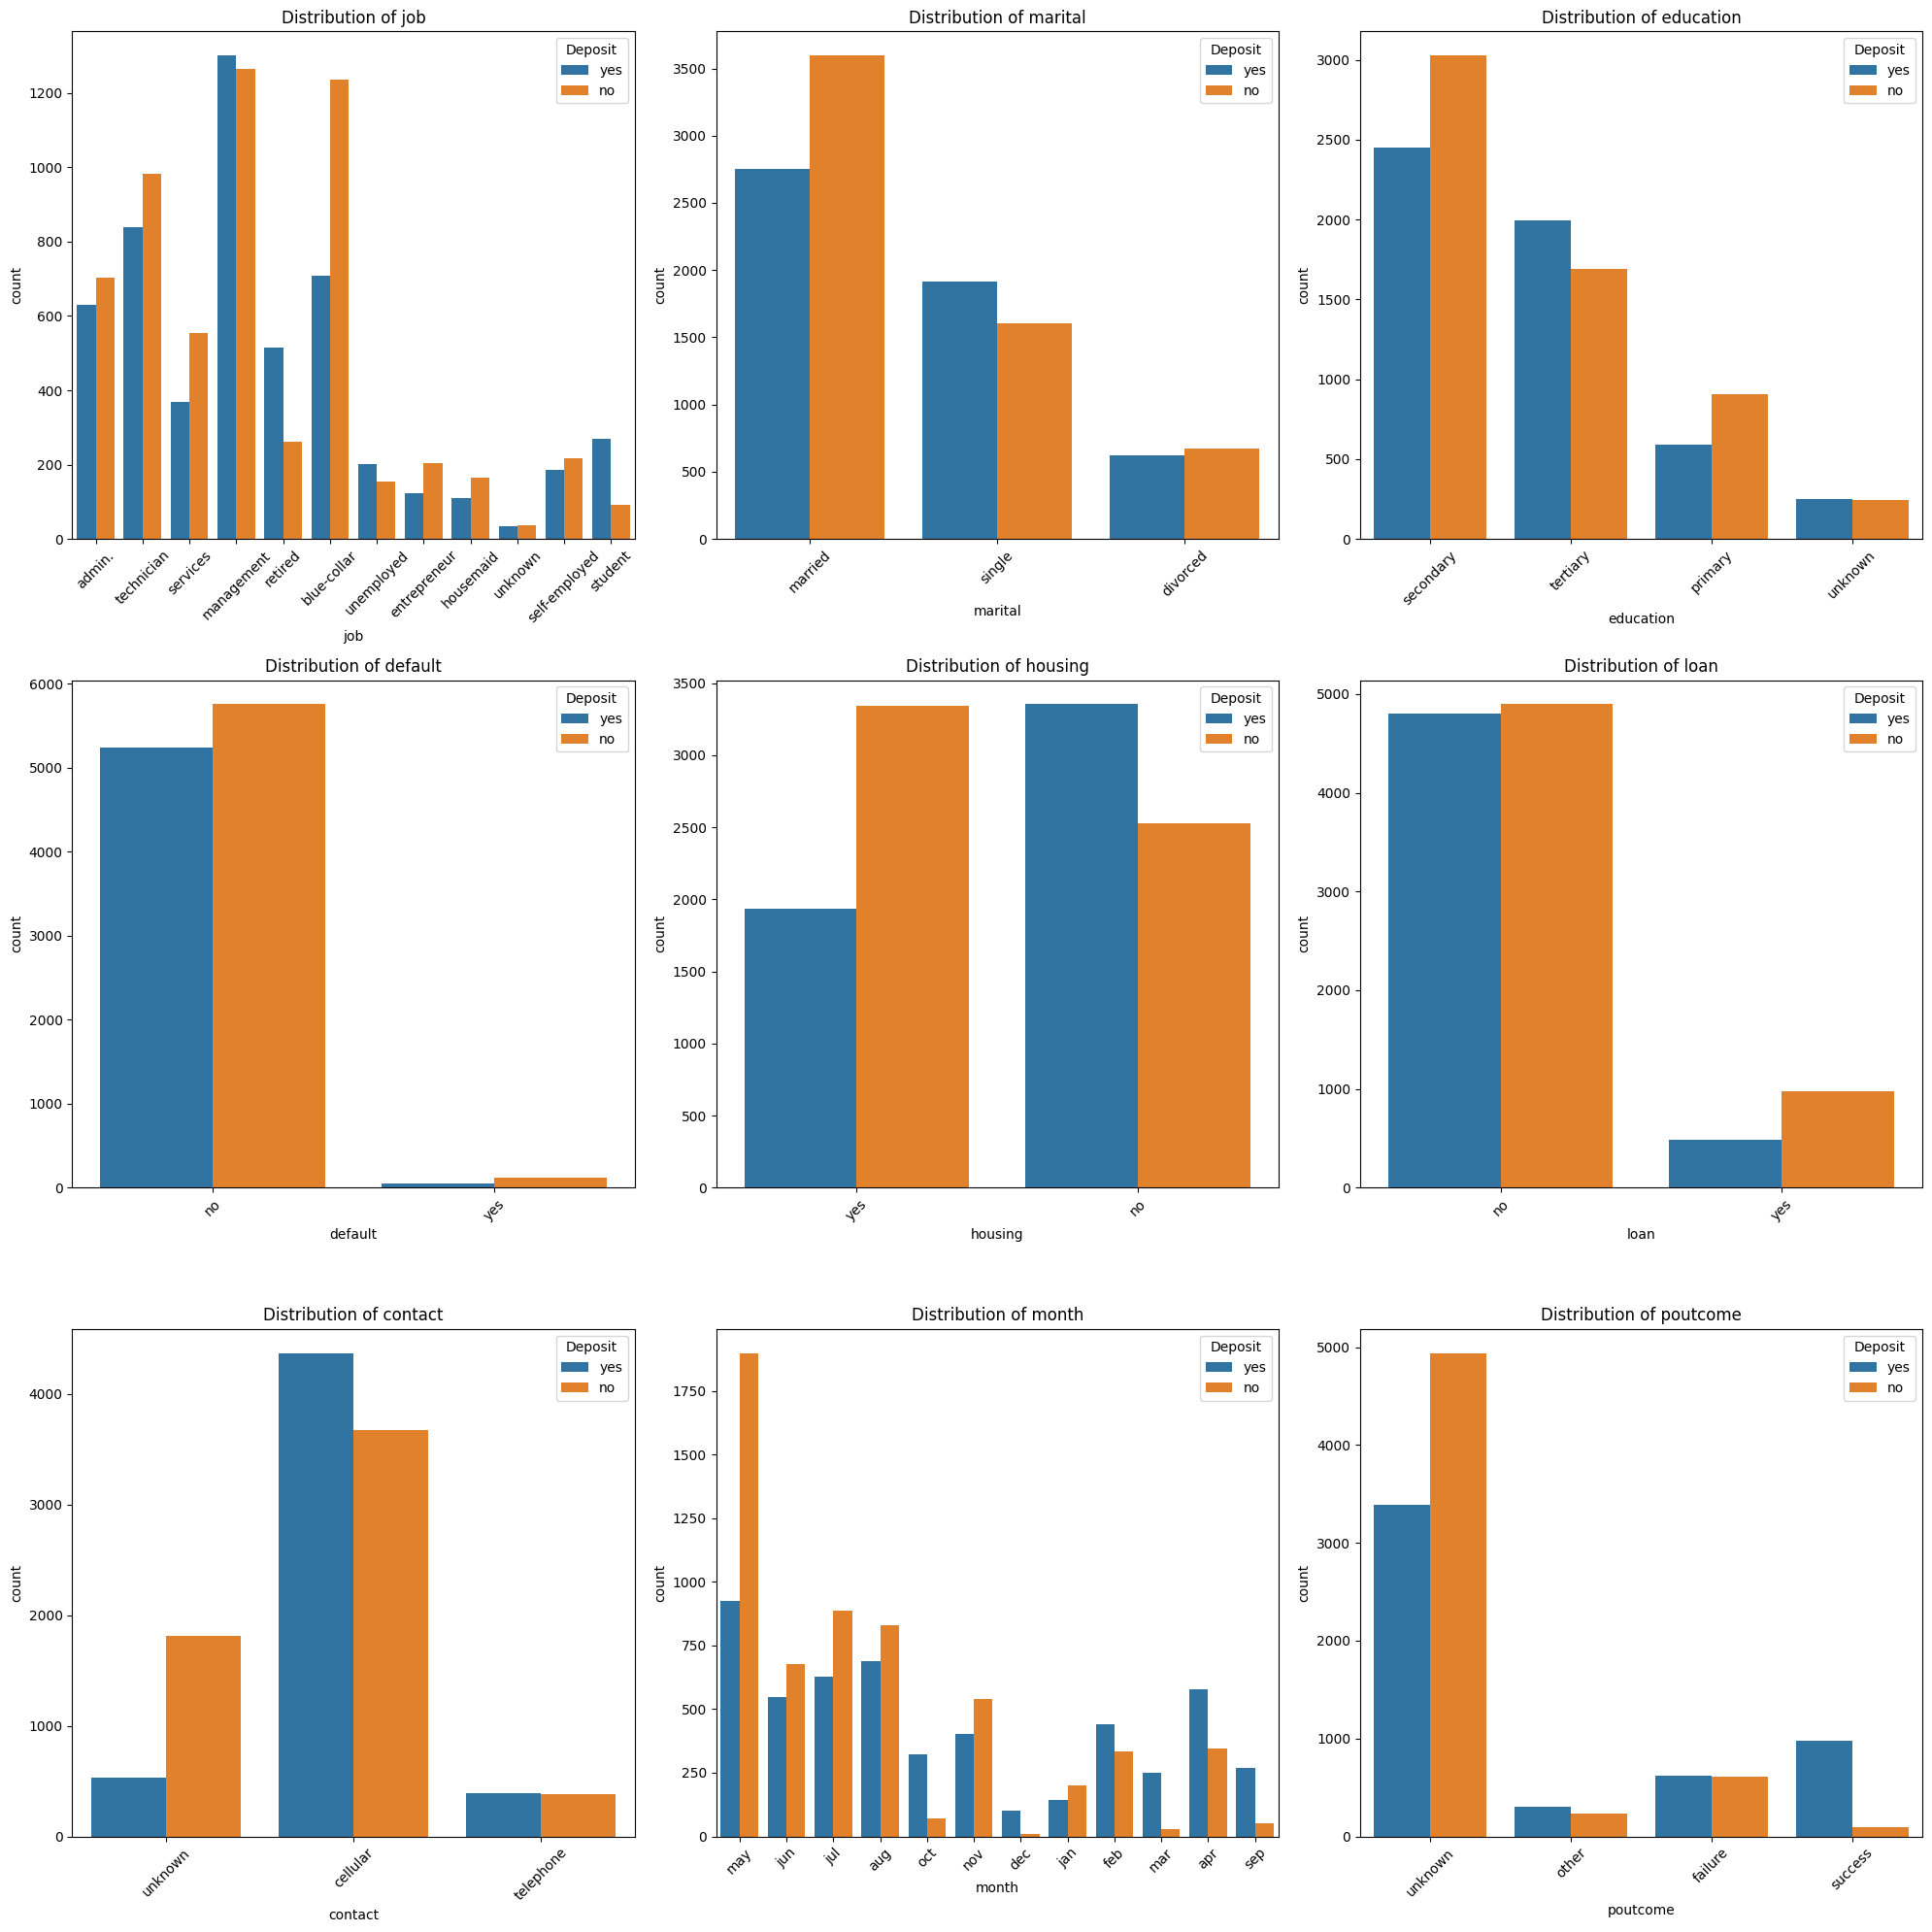

In [ ]:
## YOUR CODE HERE
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

fig, axes = plt.subplots(3, 3, figsize=(20, 20))
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, hue='deposit', data=data, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Distribution of {feature}')
    axes[i//3, i%3].legend(title='Deposit')
    axes[i//3, i%3].tick_params(axis='x', labelrotation=45)
plt.tight_layout()
plt.show()

**1.4: Explain the distribution of the target variable and the dataset.**


In [ ]:
print(data['deposit'].value_counts(normalize=True))

deposit
no     0.52616
yes    0.47384
Name: proportion, dtype: float64


The classes are nearly equally represented, with a slight majority for the "no" class.

**1.5: Split the data into development and test datasets. Which splitting methodology did you choose and why?**

**Hint: Based on the distribution of the data, try to use the best splitting strategy.**

In [ ]:
## YOUR CODE HERE
X = data.drop('deposit', axis=1)
y = data['deposit']
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Given the near-balanced nature of the dataset, we don't need to employ advanced splitting strategy, however, a stratified train-test split would still be a good idea to ensure the training and test sets maintain similar class distributions.

**1.6: Would you drop any column? Justify your reasoning.**

**Preprocess the data (Handle the Categorical Variable). Would you consider a mix of encoding techniques? Justify.
Do we need to apply scaling? Briefly Justify**



In [ ]:
y_dev = y_dev.map({'yes': 1, 'no': 0})
y_test = y_test.map({'yes': 1, 'no': 0})

In [ ]:
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

categorical_columns = X_dev.select_dtypes(include=['object', 'category']).columns
numerical_columns = X_dev.select_dtypes(include=[np.number]).columns

# 1. Correlation Analysis for Numerical Features
def check_correlation_with_target(X, y, numerical_columns):
    corr_matrix = X[numerical_columns].corrwith(y)
    return corr_matrix
correlations = check_correlation_with_target(X_dev, y_dev, numerical_columns)
print("Correlation Results:")
print(correlations)
# Check low correlation columns (corr < 0.05)
low_correlation_columns = correlations[abs(correlations) < 0.05].index.tolist()
print("Low Correlation Columns:")
print(low_correlation_columns)

# 2. VIF for Numerical Features
def check_multicollinearity(X, numerical_columns):
    vif_data = pd.DataFrame()
    vif_data["feature"] = numerical_columns
    vif_data["VIF"] = [variance_inflation_factor(X[numerical_columns].values, i) for i in range(len(numerical_columns))]
    return vif_data
scaler = StandardScaler()
X_dev_scaled = pd.DataFrame(scaler.fit_transform(X_dev[numerical_columns]), columns=numerical_columns)
vif_results = check_multicollinearity(X_dev_scaled, numerical_columns)
print("VIF Results:")
print(vif_results)
# Check high VIF columns (VIF > 10)
high_vif_columns = vif_results[vif_results['VIF'] > 10]['feature'].tolist()
print("High VIF Columns:")
print(high_vif_columns)

# 3. Chi-Squared Test for Categorical Features
def check_chi2_test(X, y, categorical_columns):
    le = LabelEncoder()
    chi2_scores, p_values = chi2(X[categorical_columns].apply(le.fit_transform), y)
    chi2_results = pd.DataFrame({'feature': categorical_columns, 'chi2_stat': chi2_scores, 'p_value': p_values})
    return chi2_results
chi2_results = check_chi2_test(X_dev, y_dev, categorical_columns)
print("Chi-Squared Test Results:")
print(chi2_results)
# Check high p-values columns (p_value > 0.05)
high_p_value_columns = chi2_results[chi2_results['p_value'] > 0.05]['feature'].tolist()
print("High P-values Columns:")
print(high_p_value_columns)

Correlation Results:
age         0.031890
balance     0.091647
day        -0.055775
duration    0.449007
campaign   -0.128606
pdays       0.149877
previous    0.134048
dtype: float64
Low Correlation Columns:
['age']
VIF Results:
    feature       VIF
0       age  1.011267
1   balance  1.014444
2       day  1.024547
3  duration  1.004582
4  campaign  1.029132
5     pdays  1.342815
6  previous  1.332048
High VIF Columns:
[]
Chi-Squared Test Results:
     feature   chi2_stat        p_value
0        job   90.851377   1.548792e-21
1    marital   13.935266   1.892149e-04
2  education   38.071259   6.820748e-10
3    default   14.919364   1.122053e-04
4    housing  199.739578   2.380466e-45
5       loan  109.649699   1.169318e-25
6    contact  767.352704  6.766374e-169
7      month   29.734017   4.955754e-08
8   poutcome   52.845769   3.607951e-13
High P-values Columns:
[]


In [ ]:
# Check 'age' contribution
# Model with 'age'
dt_with_age = DecisionTreeClassifier(random_state=42)
dt_with_age.fit(X_dev, y_dev)
y_pred_with_age = dt_with_age.predict(X_test)

# Model without 'age'
X_dev_no_age = X_dev.drop(columns=['age'])
X_test_no_age = X_test.drop(columns=['age'])
dt_no_age = DecisionTreeClassifier(random_state=42)
dt_no_age.fit(X_dev_no_age, y_dev)
y_pred_no_age = dt_no_age.predict(X_test_no_age)

# Compare performance
print(f"Accuracy with 'age': {accuracy_score(y_test, y_pred_with_age):.4f}")
print(f"F1 score with 'age': {f1_score(y_test, y_pred_with_age):.4f}")
print(f"Accuracy without 'age': {accuracy_score(y_test, y_pred_no_age):.4f}")
print(f"F1 score without 'age': {f1_score(y_test, y_pred_no_age):.4f}")

Accuracy with 'age': 0.7900
F1 score with 'age': 0.7755
Accuracy without 'age': 0.7886
F1 score without 'age': 0.7750


In [ ]:
## YOUR CODE HERE
X = data.drop('deposit', axis=1)
y = data['deposit']
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
y_dev = y_dev.map({'yes': 1, 'no': 0})
y_test = y_test.map({'yes': 1, 'no': 0})

Based on the results, the model with 'age'performs slightly better than the model without 'age', meaning there's no strong reason to exclude 'age' purely based on performance. In this case, considering that tree-based models are less sensitive to the number of variables than the linear models, I will retain all available features in case 'age' provides some additional insight in combination with other variables.

In [ ]:
## YOUR CODE HERE
target_mean_job = y_dev.groupby(X_dev['job']).mean().to_dict()
X_dev['job_target_encoded'] = X_dev['job'].map(target_mean_job)
X_test['job_target_encoded'] = X_test['job'].map(target_mean_job)
X_dev.drop(columns=['job'], inplace=True)
X_test.drop(columns=['job'], inplace=True)

ohe = OneHotEncoder(drop='first', sparse_output=False)
categorical_features = ['marital', 'default', 'housing', 'loan', 'poutcome', 'contact']
encoded_features_dev = ohe.fit_transform(X_dev[categorical_features])
encoded_feature_names_dev = ohe.get_feature_names_out(categorical_features)
X_dev = pd.concat([X_dev.drop(columns=categorical_features),
                   pd.DataFrame(encoded_features_dev, columns=encoded_feature_names_dev, index=X_dev.index)], axis=1)
encoded_features_test = ohe.transform(X_test[categorical_features])
encoded_feature_names_test = ohe.get_feature_names_out(categorical_features)
X_test = pd.concat([X_test.drop(columns=categorical_features),
                   pd.DataFrame(encoded_features_test, columns=encoded_feature_names_test, index=X_test.index)], axis=1)

oe_edu = OrdinalEncoder(categories=[['unknown', 'primary', 'secondary', 'tertiary']])
X_dev['education'] = oe_edu.fit_transform(X_dev[['education']])
X_test['education'] = oe_edu.transform(X_test[['education']])
oe_mon = OrdinalEncoder(categories=[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']])
X_dev['month'] = oe_mon.fit_transform(X_dev[['month']])
X_test['month'] = oe_mon.transform(X_test[['month']])

A mix of encoding techniques might be necessary due to the different types of categorical variables in the dataset. Some variables may benefit from One-Hot Encoding, while others might work better with Ordinal Encoding.

Scaling is not needed in this case because decision trees operate based on thresholds and are not influenced by linear transformations of features, so, they are not impacted by feature scaling.

**1.7: Fit a Decision Tree on the development data until all leaves are pure. Which scoring metric will you prefer, and why? What is the performance of the tree on the development set and test set? Evaluate test and train accuarcy on F-1 score and accuracy.**

In [ ]:
## YOUR CODE HERE
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_dev, y_dev)

y_dev_pred = dt.predict(X_dev)
y_test_pred = dt.predict(X_test)

print("Decision Tree Performance:")
print(f"Development set - Accuracy: {accuracy_score(y_dev, y_dev_pred):.4f}, F1 Score: {f1_score(y_dev, y_dev_pred, pos_label=1):.4f}")
print(f"Test set - Accuracy: {accuracy_score(y_test, y_test_pred):.4f}, F1 Score: {f1_score(y_test, y_test_pred, pos_label=1):.4f}")

Decision Tree Performance:
Development set - Accuracy: 1.0000, F1 Score: 1.0000
Test set - Accuracy: 0.7900, F1 Score: 0.7755


I would prefer the F1 score as the scoring metric for this problem because it provides a balanced view between precision and recall, which are critical in this marketing campaign. The bank wants to minimize both false positives (predicting a client will subscribe when they won’t) and false negatives (failing to identify clients who will subscribe). The F1 score allows us to manage this trade-off more effectively than accuracy, which can be misleading in the presence of class imbalance or when the cost of different types of errors varies. By focusing on both precision and recall, the F1 score helps ensure the model accurately identifies potential subscribers without overestimating their numbers.

**1.8: Visualize the trained tree until the suitable max_depth.**

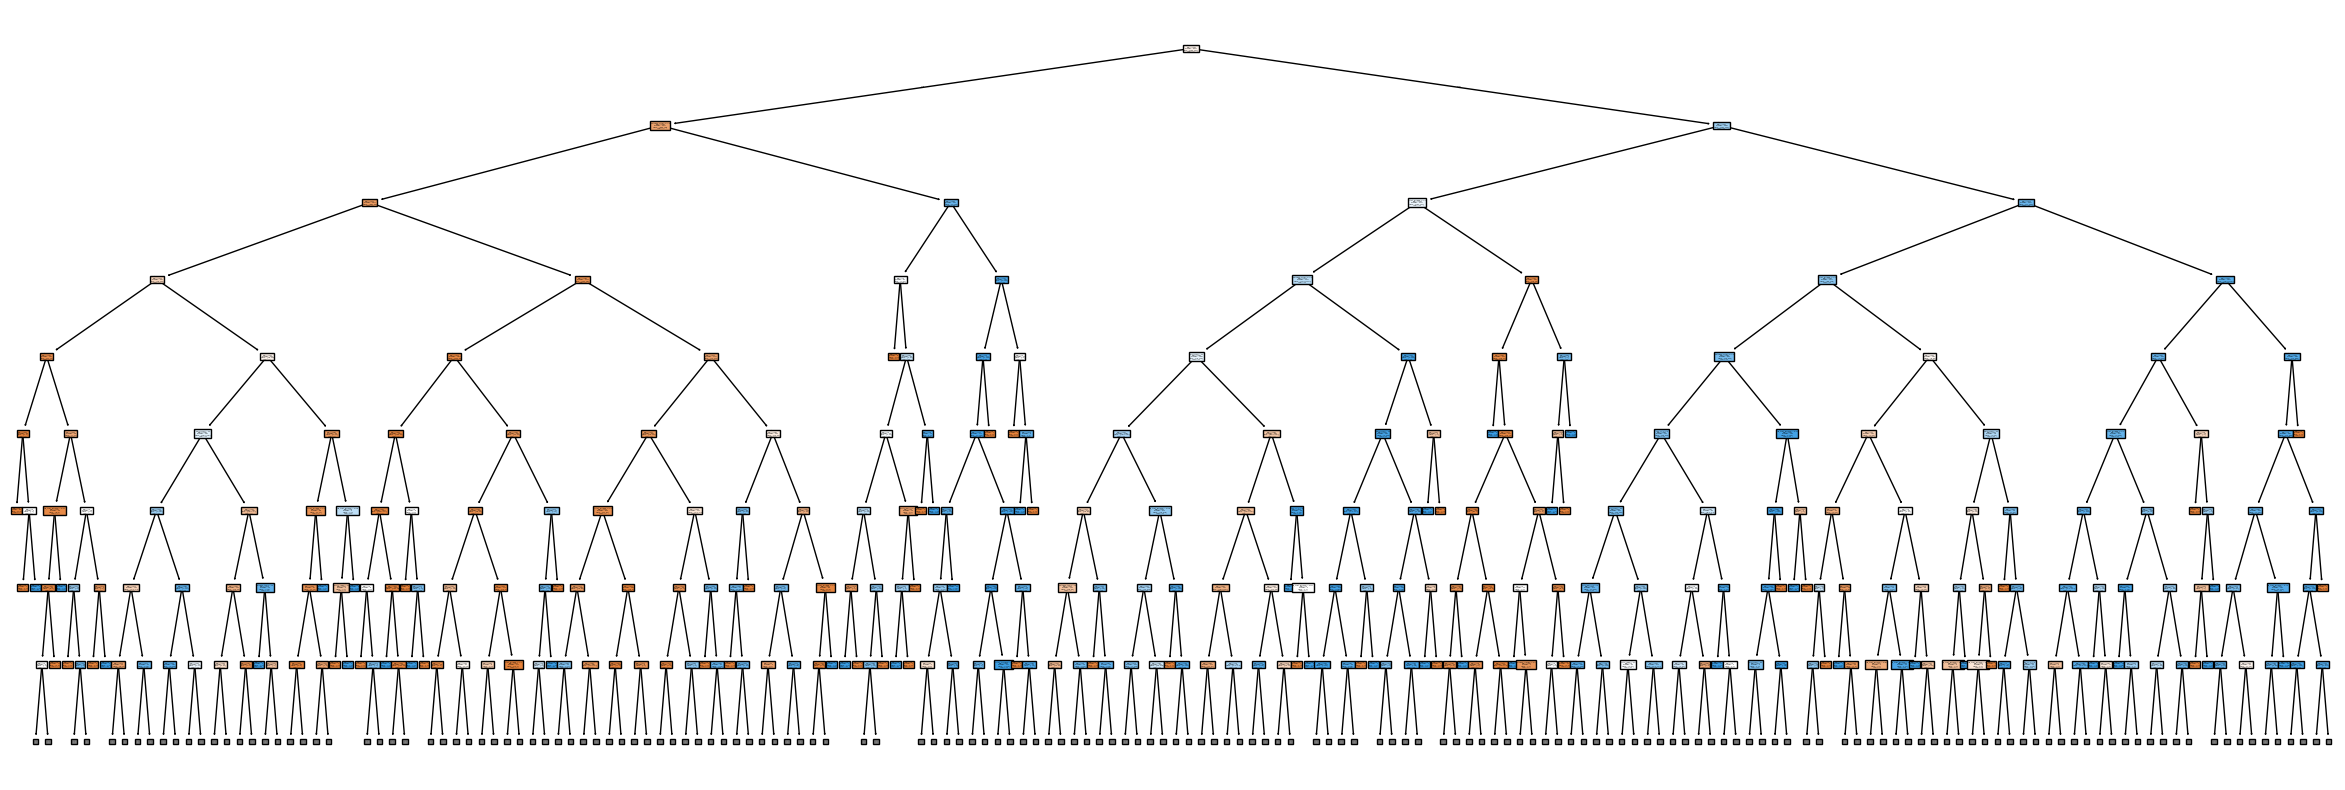

In [ ]:
## YOUR CODE HERE
plt.figure(figsize=(30,10))
plot_tree(dt, max_depth=8, feature_names=X_dev.columns, class_names=['no', 'yes'], filled=True)
plt.show()

**1.9: Prune the tree using one of the techniques discussed in class and evaluate the performance.**

**Print the optimal value of the tuned parameter.**

In [ ]:
## YOUR CODE HERE
dt = DecisionTreeClassifier(random_state=42)
path = dt.cost_complexity_pruning_path(X_dev, y_dev)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

param_grid = {'ccp_alpha': ccp_alphas}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_dev, y_dev)

print(f"Optimal ccp_alpha: {grid_search.best_params_['ccp_alpha']}")

pruned_dt = grid_search.best_estimator_

y_dev_pred_pruned = pruned_dt.predict(X_dev)
y_test_pred_pruned = pruned_dt.predict(X_test)

print("Pruned Decision Tree Performance:")
print(f"Development set - Accuracy: {accuracy_score(y_dev, y_dev_pred_pruned):.4f}, F1 Score: {f1_score(y_dev, y_dev_pred_pruned, pos_label=1):.4f}")
print(f"Test set - Accuracy: {accuracy_score(y_test, y_test_pred_pruned):.4f}, F1 Score: {f1_score(y_test, y_test_pred_pruned, pos_label=1):.4f}")

Optimal ccp_alpha: 0.0005159046057509348
Pruned Decision Tree Performance:
Development set - Accuracy: 0.8612, F1 Score: 0.8604
Test set - Accuracy: 0.8419, F1 Score: 0.8401


**1.10: List the top 3 most important features for this trained tree? How would you justify these features being the most important?**

In [ ]:
## YOUR CODE HERE
feature_importance = pd.DataFrame({'feature': X_dev.columns, 'importance': pruned_dt.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("Top 3 most important features:")
print(feature_importance.head(3))

Top 3 most important features:
             feature  importance
5           duration    0.484430
16  poutcome_success    0.124353
4              month    0.111610


1. duration: Clients who are willing to invest more time during a phone call are typically more engaged and more likely to subscribe.
2. poutcome_success: Clients who have previously engaged positively with the bank are more familiar with its offerings and more likely to trust the institution. So, it is more likely that they will subscribe again in the current campaign.
3. month: This feature likely captures seasonal or temporal trends in client behavior. For example, clients contacted in certain months (perhaps due to holidays or end-of-year bonuses) may be more inclined to subscribe to a term deposit.


## Question 2: Random Forests

**2.1: Train a Random Forest model on the development dataset using RandomForestClassifier class in sklearn. Use the default parameters. Evaluate the performance of the model on test dataset. Use accuracy and F1 score to evaluate. Does this perform better than Decision Tree on the test dataset (compare to results in Q 1.7)?**

In [ ]:
## YOUR CODE HERE
rf = RandomForestClassifier(random_state=42)
rf.fit(X_dev, y_dev)

y_dev_pred_rf = rf.predict(X_dev)
y_test_pred_rf = rf.predict(X_test)

print("Random Forest Performance:")
print(f"Development set - Accuracy: {accuracy_score(y_dev, y_dev_pred_rf):.4f}, F1 Score: {f1_score(y_dev, y_dev_pred_rf, pos_label=1):.4f}")
print(f"Test set - Accuracy: {accuracy_score(y_test, y_test_pred_rf):.4f}, F1 Score: {f1_score(y_test, y_test_pred_rf, pos_label=1):.4f}")

Random Forest Performance:
Development set - Accuracy: 1.0000, F1 Score: 1.0000
Test set - Accuracy: 0.8518, F1 Score: 0.8482


**2.2: Do all trees in the trained random forest model have pure leaves? How would you verify that all trees have pure leaves? Print the score (mean accuracy) values of your choosen method**

In [ ]:
## YOUR CODE HERE
for estimator in rf.estimators_:
    left_children = estimator.tree_.children_left
    right_children = estimator.tree_.children_right
    impurities = estimator.tree_.impurity[((left_children == -1) & (right_children == -1))]
    if not (impurities == 0).all():
      print(False)
print(True)

True


In [ ]:
rf.oob_score = True
rf.fit(X_dev, y_dev)
oob_score = rf.oob_score_
print(f"Out-of-bag score: {oob_score:.4f}")

Out-of-bag score: 0.8470


**2.3: Assume you want to improve the performance of this model. Also, assume that you had to pick two hyperparameters that you could tune to improve its performance. Which hyperparameters would you choose and why?**


1. n_estimators (Number of Trees in the Forest): This parameter controls how many decision trees are used in the forest. Increasing the number of trees can generally improve performance because the model averages predictions from multiple trees, reducing variance and increasing robustness. However, after a certain point, the performance gains start to diminish, and the computational cost increases. Tuning this parameter helps find the optimal number of trees to balance performance and training time.

2. max_depth (Maximum Depth of Trees): This parameter controls how deep each decision tree can grow. If the trees are allowed to grow too deep, they may overfit the training data, capturing noise and irrelevant patterns. On the other hand, if the trees are too shallow, they may not capture enough complexity, leading to underfitting. Tuning this parameter helps control the complexity of the trees and strike a balance between overfitting and underfitting.

**2.4: Now, assume you had to choose up to 5 different values (each) for these two hyperparameters. How would you choose these values that could potentially give you a performance lift?**

1. For n_estimators (Number of Trees): [100, 200, 500, 1000, 1500]

Starting with 100, which is the default, provides a baseline. 200 and 500 offer moderate increases, potentially improving performance by reducing variance without significantly increasing computation time. 1000 and 1500 test higher values where the model might stabilize, ensuring that the performance has plateaued and additional trees do not yield further improvements.

2. For max_depth (Maximum Tree Depth): [5, 10, 15, 20, 30]

5 is a shallow depth to prevent overfitting and capture basic patterns in the data. For 10 and 15, these are moderate depths to allow the trees to capture more complexity without being overly complex. 20 represents a deeper tree to capture more detailed patterns and ensure that the model is not underfitting. 30 allows the trees to grow even deeper, which will help test if depth leads to better performance or overfitting.

**2.5: Perform model selection using the chosen values for the hyperparameters. Use out-of-bag (OOB) error for finding the optimal hyperparameters. Report on the optimal hyperparameters. Estimate the performance of the optimal model (model trained with optimal hyperparameters) on train and test dataset? Has the performance improved over your plain-vanilla random forest model trained in Q2.1?**

In [ ]:
## YOUR CODE HERE
param_grid = {
    'n_estimators': [100, 200, 500, 1000, 1500],
    'max_depth': [5, 10, 15, 20, 30]
}

best_oob_score = 0
best_params = {}
best_model = None

for n_estimators in param_grid['n_estimators']:
    for max_depth in param_grid['max_depth']:

        rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, oob_score=True, random_state=42)
        rf.fit(X_dev, y_dev)

        oob_score = rf.oob_score_

        if oob_score > best_oob_score:
            best_oob_score = oob_score
            best_params = {'n_estimators': n_estimators, 'max_depth': max_depth}
            best_model = rf

print(f"\nOptimal hyperparameters: {best_params}")
print(f"Best OOB score: {best_oob_score:.4f}")

y_dev_pred_optimal = best_model.predict(X_dev)
y_test_pred_optimal = best_model.predict(X_test)

print("\nPerformance of the optimal model:")
print(f"Development set - Accuracy: {accuracy_score(y_dev, y_dev_pred_optimal):.4f}, F1 Score: {f1_score(y_dev, y_dev_pred_optimal, pos_label=1):.4f}")
print(f"Test set - Accuracy: {accuracy_score(y_test, y_test_pred_optimal):.4f}, F1 Score: {f1_score(y_test, y_test_pred_optimal, pos_label=1):.4f}")


Optimal hyperparameters: {'n_estimators': 1500, 'max_depth': 30}
Best OOB score: 0.8512

Performance of the optimal model:
Development set - Accuracy: 1.0000, F1 Score: 1.0000
Test set - Accuracy: 0.8576, F1 Score: 0.8552


 **2.6: Can you find the top 3 most important features from the model trained in Q2.5? How do these features compare to the important features that you found from Q1.10? If they differ, which feature set makes more sense?**

In [ ]:
## YOUR CODE HERE
feature_importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': X_dev.columns, 'importance': feature_importances})
top_3_features = feature_importance_df.sort_values(by='importance', ascending=False).head(3)
print("Top 3 most important features:")
print(top_3_features)

Top 3 most important features:
    feature  importance
5  duration    0.358459
2   balance    0.088514
0       age    0.080364


1. duration (common feature): Both models identified duration as the most important feature. This is consistent because the duration of the last contact is a strong indicator of client engagement. The longer a client spends on the phone, the more likely they are interested in the term deposit.

2. balance vs. poutcome_success: In the Random Forest model, balance is the second most important feature, while in the Decision Tree model, poutcome_success was ranked second. It makes sense that balance is an important feature in the Random Forest model because clients with higher balances are generally more financially stable, making them more likely to consider investing in term deposits.

3. age vs. month: In the Random Forest model, age is the third most important feature, while in the Decision Tree model, month was ranked third. This feature likely reflects different life stages that impact clients' financial priorities and risk tolerance, influencing their decision to subscribe to a deposit.


Overall, the Random Forest model makes more sense because:

1). Random forest model has a slightly higher test F1-score, showing that it tends to produce more robust and generalizable results by averaging the predictions of many trees. This likely makes the inclusion of balance more reliable as a key predictor compared to poutcome.

2). The inclusion of balance and age in the Random Forest model makes intuitive sense for a financial product like a term deposit.

## Question 3: Gradient Boosted Trees

**3.1: Choose three hyperparameters to tune HistGradientBoostingClassifier on the development dataset using 5-fold cross validation. For each hyperparmeter, give it 3 potential values. Report on the time taken to do model selection for the model. Also, report the performance of the test dataset from the optimal models.**

In [ ]:
## YOUR CODE HERE
import time

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_iter': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

hgb = HistGradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(estimator=hgb, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

start_time = time.time()

grid_search.fit(X_dev, y_dev)

end_time = time.time()
time_taken = end_time - start_time

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Optimal hyperparameters: {best_params}")
print(f"Time taken for model selection: {time_taken:.2f} seconds")

y_test_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred, pos_label=1)
print(f"Test set performance - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")

Optimal hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'max_iter': 100}
Time taken for model selection: 99.72 seconds
Test set performance - Accuracy: 0.8674, F1 Score: 0.8647


**3.2: Repeat 3.1 for XGBoost.**

**Note**: For XGBoost, you **DO NOT HAVE TO** choose the same hyperparameters as HistGradientBoostingClassifier.

In [ ]:
## YOUR CODE HERE
import time

param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

start_time = time.time()

grid_search.fit(X_dev, y_dev)

end_time = time.time()
time_taken = end_time - start_time

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Optimal hyperparameters: {best_params}")
print(f"Time taken for model selection: {time_taken:.2f} seconds")

y_test_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred, pos_label=1)
print(f"Test set performance - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:42:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Optimal hyperparameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}
Time taken for model selection: 67.73 seconds
Test set performance - Accuracy: 0.8657, F1 Score: 0.8635


**3.3: Compare the results on the test dataset of XGBoost and HistGradientBoostingClassifier. Which model do you prefer and why?**

HGB achieves higher accuracy and F1 score, making it the preferred model for this dataset. However, HGB takes slightly longer to perform model selection, which may become a limitation when working with larger datasets. As a result, for the current dataset, since the difference in time taken is small, I prefer HistGradientBoostingClassifier due to its marginally better test performance.

**3.4: Can you list the top 3 important features from the trained XGBoost model? How do they differ from the features found from Random Forest and Decision Tree?**

In [ ]:
## YOUR CODE HERE
feature_importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': X_dev.columns, 'importance': feature_importances})
top_3_features = feature_importance_df.sort_values(by='importance', ascending=False).head(3)

print("Top 3 most important features from the XGBoost model:")
print(top_3_features)

Top 3 most important features from the XGBoost model:
             feature  importance
16  poutcome_success    0.222965
19   contact_unknown    0.194835
5           duration    0.138402



1. XGBoost:
   - 'poutcome_success': This feature, indicating whether the outcome of a previous marketing campaign was successful, is the most important feature for XGBoost. It suggests that clients who responded positively in previous campaigns are much more likely to subscribe again.
   - 'contact_unknown': This feature indicates whether the contact communication type is unknown. This could indicate a lower level of client engagement with the bank or that the client has not actively updated their contact details, which might correlate with a lower likelihood of responding to subscribing to a term deposit.
   - 'duration': The length of the last call is the third most important feature, aligning with other models where longer engagement on the phone is a strong indicator of interest in the term deposit.

2. Random Forest:
   - 'duration'
   - 'balance'
   - 'age'

   In Random Forest, 'duration' was the most important feature, showing that longer call duration directly correlates with a higher likelihood of subscription. However, 'balance' and 'age' were more prominent in Random Forest, reflecting that financial status (via balance) and the life stages (via age) are key factors in subscription decisions for this model.

3. Decision Tree:
   - 'duration'
   - 'poutcome_success'
   - 'month'

   In the Decision Tree, 'duration' was also the most important feature, with 'month' and 'poutcome_success' following closely. This indicates that engagement during the call, timing, and previous outcomes were key factors for predicting subscription likelihood in this model.

**3.5: Can you choose the top 5 features (as given by feature importances from XGBoost) and repeat Q3.2? Does this model perform better than the one trained in Q3.2? Why or why not is the performance better?**

In [ ]:
## YOUR CODE HERE
feature_importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': X_dev.columns, 'importance': feature_importances})
top_5_features = feature_importance_df.sort_values(by='importance', ascending=False).head(5)

print("Top 5 most important features from the XGBoost model:")
print(top_5_features)

Top 5 most important features from the XGBoost model:
             feature  importance
16  poutcome_success    0.222965
19   contact_unknown    0.194835
5           duration    0.138402
13       housing_yes    0.100007
4              month    0.050759


In [ ]:
## YOUR CODE HERE
import time

top_5_features = ['poutcome_success', 'contact_unknown', 'duration', 'housing_yes', 'month']

X_dev_top5 = X_dev[top_5_features]
X_test_top5 = X_test[top_5_features]

param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

start_time = time.time()

grid_search.fit(X_dev_top5, y_dev)

end_time = time.time()
time_taken = end_time - start_time

best_model_top5 = grid_search.best_estimator_
best_params_top5 = grid_search.best_params_
print(f"Optimal hyperparameters (top 5 features): {best_params_top5}")
print(f"Time taken for model selection (top 5 features): {time_taken:.2f} seconds")

y_test_pred_top5 = best_model_top5.predict(X_test_top5)
accuracy_top5 = accuracy_score(y_test, y_test_pred_top5)
f1_top5 = f1_score(y_test, y_test_pred_top5, pos_label=1)
print(f"Test set performance (top 5 features) - Accuracy: {accuracy_top5:.4f}, F1 Score: {f1_top5:.4f}")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:46:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Optimal hyperparameters (top 5 features): {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Time taken for model selection (top 5 features): 40.08 seconds
Test set performance (top 5 features) - Accuracy: 0.8397, F1 Score: 0.8352


The model trained on the top 5 features performs slightly worse than the model trained on all features, as shown by the lower accuracy and F1 score. While it offers faster model selection and reduced complexity, the drop in performance may suggest that the full feature model is better.

Possible reasons:
1. The model trained on the top 5 features has less information available for predictions. While these top 5 features are the most important, they don’t capture all the relevant patterns in the data. This leads to a slight drop in performance because some valuable information contained in the other features is no longer available to the model.
2. The model trained on the top 5 features uses a shallower tree (max_depth=3), compared to the full feature model with deeper trees (max_depth=6). Shallower trees might not capture complex interactions between the features as well as deeper trees.